In [2]:
import pandas as pd



## Analyse filtrée sur les date de 01.01.2022 à 31.12.2024

In [3]:
import pandas as pd

# Charger le CSV en gérant les erreurs
df = pd.read_csv("Codes/Propriétés privées/Raw/query_result_2025-03-04T15_59_48.556253Z.csv", 
                 delimiter=",",  # Change en ";" si nécessaire
                 encoding="utf-8",  # Essaie "ISO-8859-1" si problème
                 on_bad_lines="skip")  # Ignore les lignes corrompues

# Afficher les 3 premières lignes
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: 'Codes/Propriétés privées/Raw/query_result_2025-03-04T15_59_48.556253Z.csv'

In [167]:
df.shape

(1345922, 13)

In [170]:
df['customers_creation_date'] = pd.to_datetime(df['customers_creation_date'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345922 entries, 0 to 1345921
Data columns (total 13 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   id                       1268330 non-null  object        
 1   nom                      1245112 non-null  object        
 2   prenom                   460441 non-null   object        
 3   email                    1140332 non-null  object        
 4   telephone                1155590 non-null  object        
 5   origine                  1018505 non-null  object        
 6   nom agence               1255307 non-null  object        
 7   Type(s) contact          1255923 non-null  object        
 8   suivi par                1253662 non-null  object        
 9   entry_street_address     1068088 non-null  object        
 10  entry_postcode           196167 non-null   object        
 11  entry_city               229081 non-null   object        
 12  

## Filtrage du data Set de 2022 à fin 2024 

In [182]:
start_date = "2022-01-01"
end_date = "2024-12-31"

# Filtrer le DataFrame selon l'intervalle de dates
df_filtered = df[(df['customers_creation_date'] >= start_date) & (df['customers_creation_date'] <= end_date)]

df_filtered.shape

(105939, 13)

In [184]:
# On crée d'abord une copie du DataFrame pour éviter le SettingWithCopyWarning
df_filtered = df_filtered.copy()

# On crée une colonne "nb_telephone" en comptant le nombre d'occurrences par numéro
df_filtered.loc[:, 'nb_telephone'] = df_filtered.groupby('telephone')['telephone'].transform('count')

# On trie ensuite par ordre décroissant
df_sorted_Phone1_count = df_filtered.sort_values(by='nb_telephone', ascending=False)

# On affiche les 3 premières lignes
df_sorted_Phone1_count.head(3)


,id,nom,prenom,email,telephone,origine,nom agence,Type(s) contact,suivi par,entry_street_address,entry_postcode,entry_city,customers_creation_date,nb_telephone
937991,2643069,ICADE,NaN,F@GMAIL.COM,000000000,NaN,Proprietes-privees MIGUEL Franck,Vendeur,Franck MIGUEL,5 Quai de Houat,56170,QUIBERON,2023-09-19,373.0
704784,2314138,Realites,NaN,a.pele@proprietes-privees.com,000000000,NaN,Proprietes-privees PELE Anabelle,Vendeur,Anabelle PELE,2 boulevard de l'Est,85300,CHALLANS,2022-10-04,373.0
1329349,3062576,forest,NaN,FOREST@ORANGE.FR,000000000,NaN,Proprietes-privees COLLON Nathalie,Vendeur,Nathalie COLLON,NaN,42410,BALBIGNY,2024-11-13,373.0


In [186]:
df_sorted_Phone1_count.shape

(105939, 14)

In [224]:
df_filtered = df_filtered[df_filtered['nb_telephone'] >= 1]
df_unique = df_filtered[['email','telephone', 'nb_telephone','Type(s) contact','origine','entry_postcode','customers_creation_date']].drop_duplicates("email")
df_sorted = df_unique.sort_values(by='nb_telephone', ascending=False)

df_sorted.shape

(55838, 7)

In [226]:
df_sorted["nb_telephone"].describe()

count    55838.000000
mean         4.782245
std         32.150309
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        373.000000
Name: nb_telephone, dtype: float64

In [210]:
df_sorted.columns

Index(['email', 'telephone', 'nb_telephone', 'Type(s) contact', 'origine',
       'entry_postcode', 'customers_creation_date'],
      dtype='object')

In [230]:
df_sorted.isnull().sum()

email                          1
telephone                      0
nb_telephone                   0
Type(s) contact                0
origine                    44991
entry_postcode              3264
customers_creation_date        0
dtype: int64

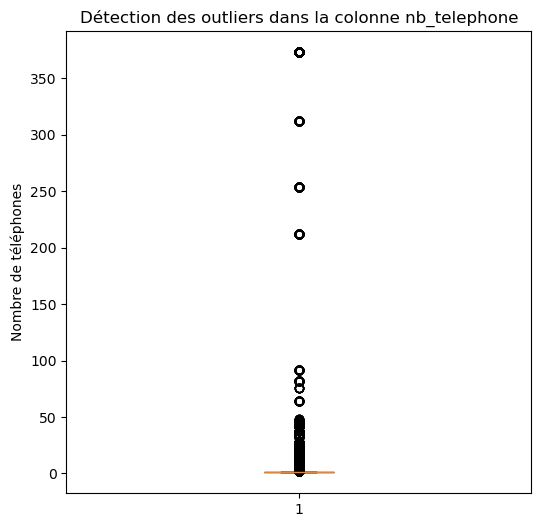

In [232]:
import matplotlib.pyplot as plt

# Vérification de l'existence de df_filtered
if 'df_filtered' in globals():
    # Création du boxplot
    plt.figure(figsize=(6, 6))
    plt.boxplot(df_sorted["nb_telephone"], vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))

    # Ajout des labels
    plt.ylabel("Nombre de téléphones")
    plt.title("Détection des outliers dans la colonne nb_telephone")

    # Affichage du graphique
    plt.show()

In [234]:
dftest = df_sorted.groupby("nb_telephone")["nb_telephone"].count().reset_index(name="count")

In [236]:
dftest

,nb_telephone,count
0,1.0,47933
1,2.0,5217
2,3.0,812
3,4.0,288
4,5.0,122
5,6.0,103
6,7.0,60
7,8.0,47
8,9.0,26
9,10.0,30


In [240]:
dftest["count"].describe()

count       46.000000
mean      1213.869565
std       7083.484766
min          1.000000
25%         10.750000
50%         25.500000
75%         65.250000
max      47933.000000
Name: count, dtype: float64

In [242]:
df_sorted.columns

Index(['email', 'telephone', 'nb_telephone', 'Type(s) contact', 'origine',
       'entry_postcode', 'customers_creation_date'],
      dtype='object')

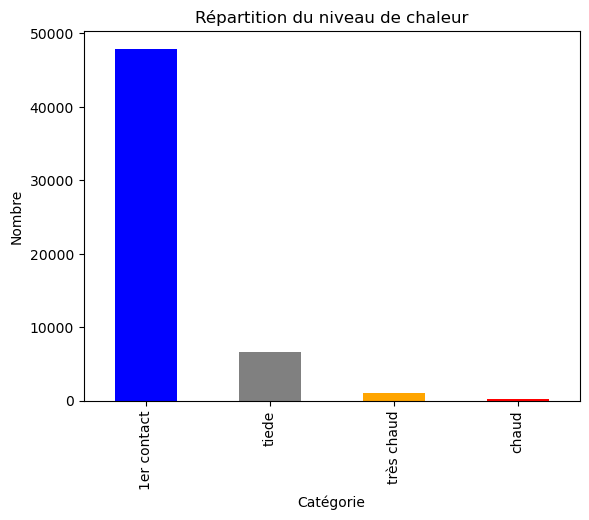

In [252]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Création de la colonne selon les conditions
conditions = [
    (df_sorted['nb_telephone'] == 1),
    (df_sorted['nb_telephone'] > 1) & (df_sorted['nb_telephone'] < 10),
    (df_sorted['nb_telephone'] >= 10) & (df_sorted['nb_telephone'] < 25),
    (df_sorted['nb_telephone'] >= 25)
]
categories = ['1er contact', 'tiede', 'chaud', 'très chaud']

df_sorted['niveau_chaleur'] = np.select(conditions, categories, default='aucun')

# 2. Comptage par catégorie
counts = df_sorted['niveau_chaleur'].value_counts()

# 3. Affichage en bar plot
counts.plot(kind='bar', color=['blue', 'gray', 'orange', 'red', 'green'])
plt.title('Répartition du niveau de chaleur')
plt.xlabel('Catégorie')
plt.ylabel('Nombre')
plt.show()


In [254]:
counts

niveau_chaleur
1er contact    47933
tiede           6675
très chaud       977
chaud            253
Name: count, dtype: int64

## Analyse global sans filtrage de date 

In [194]:
df["Type(s) contact"].value_counts()

Type(s) contact
Demandeur,Demandeur                    1452430
Vendeur                                 144760
Demandeur                                54487
Acquéreur Archivé,Acquéreur Archivé      19975
Vendeur,Vendeur                          17118
                                        ...   
Propriétaire-Bailleurs archivés              1
Demandeur,Acquéreur Signé,Demandeur          1
Demandeur,Vendeur,Vendeur Signé              1
A supprimer                                  1
Vendeur,Locataire                            1
Name: count, Length: 227, dtype: int64

In [196]:
df["origine"].value_counts()

origine
Se Loger                   760889
Le Bon Coin                393345
Bien Ici                   127679
Ouest France (Internet)     33913
AvendreAlouer               32581
                            ...  
Internet Refleximmo             2
Radio                           2
Relocation                      2
Vite Logé                       1
maisons et appartements         1
Name: count, Length: 163, dtype: int64

## Liste des origines 

In [140]:
df['origine'].unique().tolist()

['Réseau',
 nan,
 'Ancien client',
 'Cliente antiguo',
 'Old customer',
 'Prospection',
 'Pige',
 'Bouche à oreille',
 'Word of mouth',
 'Recommandation client',
 'Apporteur',
 'Colaborador',
 'Contributor',
 'Passage',
 'Publicité',
 'Contact téléphonique',
 'Fichier client',
 'Prospection terrain',
 'Panneau A vendre/ Vendu',
 'Prospection téléphonique',
 'Le Bon Coin',
 'Notoriedad',
 'Notoriété',
 'Reputation',
 'Entreprise',
 'Inconnue',
 'Ancien vendeur',
 'Annonce SeLoger',
 'Notaire',
 'Annonce Belles Demeures',
 'Demarchage',
 'Boîtage',
 'Buzón de correo',
 'Mailbox',
 'AvendreAlouer',
 'Logic Immo',
 'Green-Acres',
 'Se Loger',
 'Explorimmo',
 'Ad',
 'Annonce Pub',
 'Anuncio publicitario',
 'Bien Ici',
 'Ouest France (Internet)',
 'Red social',
 'Réseau social',
 'Social network',
 'E-mailing',
 'email',
 'Annonce web divers',
 'Espace Acheteur',
 'Annonce pro divers',
 'Espace Clients',
 'Relation personnelle',
 'Annuaire',
 'Directorio',
 'Directory',
 'Inter- réseau',
 'P

In [158]:
df.shape

(1723784, 9)

In [180]:
df_paradissimo = df[df['origine'] == 'Se Loger']

In [184]:
df_paradissimo.head(5)

,id,nom,prenom,email,telephone,origine,nom agence,Type(s) contact,suivi par
293,176131,Delage,NaN,tkhalifa82@yahoo.fr,0614493136,Se Loger,Proprietes-privees AIX MARSEILLE,"Demandeur,Demandeur",NaN
331,177846,Corinne plantier,NaN,corinne-plantier@wanadoo.fr,0684622812,Se Loger,Proprietes-privees HOVEN Roelien,"Demandeur,Demandeur",Roelien HOVEN
336,177894,Thomas Cazenave-Piarrot,NaN,t.cazenave.piarrot@gmail.com,0673115421,Se Loger,Proprietes-privees GALMAR Myriam,"Demandeur,Demandeur",Myriam GALMAR
341,177927,Derrien,NaN,guilainederrien@gmail.com,0603974135,Se Loger,Proprietes-privees DAUVÉ Laurent,"Demandeur,Demandeur",Laurent DAUVÉ
427,178638,DIAKITE,Diouma,dioumadiakite@hotmail.com,0651454971,Se Loger,Proprietes-privees LAVIEILLE Valérie,"Demandeur,Demandeur",Valérie LAVIEILLE


In [181]:
df_paradissimo.shape

(760889, 9)

In [198]:
# Création d'une colonne 'phone_count' pour montrer le nombre de fois que apparait un numéro de téléphone 
df['nb_telephone'] = df.groupby('telephone')['telephone',].transform('count')
df_sorted_Phone1_count = df.sort_values(by='nb_telephone', ascending=False)
df_sorted_Phone1_count.head(3)

,id,nom,prenom,email,telephone,origine,nom agence,Type(s) contact,suivi par,nb_telephone
299490,950808,Zoken,NaN,zoken@live.fr,0600000000,Se Loger,Proprietes-privees ARRIGHI Aurélien,"Demandeur,Demandeur",Aurélien ARRIGHI,1141.0
1539717,2877446,BOURQUAL,Meryem,PP@GMAIL.COM,0600000000,NaN,Proprietes-privees ABRAHAM Sophie,Vendeur,Sophie ABRAHAM,1141.0
98955,543668,Jaja,NaN,fabien.jalbaud@aude.fr,0600000000,AvendreAlouer,Proprietes-privees PARAVISINI Anne-Laure,"Demandeur,Demandeur",Anne-Laure PARAVISINI,1141.0


In [200]:
df.shape

(1723784, 10)

In [202]:
df_filtered = df[df['nb_telephone'] >= 1]
df_unique = df_filtered[['email','telephone', 'nb_telephone','Type(s) contact','origine']].drop_duplicates()
df_sorted = df_unique.sort_values(by='nb_telephone', ascending=False)

df_sorted.shape

(1201072, 5)

In [204]:
import re

# Fonction de validation des numéros de téléphone
def is_valid_phone(phone):
    """
    Vérifie si un numéro de téléphone est valide :
    - 10 chiffres
    - Commence par 06, 07 ou 02
    - N'est pas un numéro improbable (ex: 0600000000)
    """
    phone = str(phone).strip()  # Nettoyage
    
    # Vérifie si c'est bien un numéro de 10 chiffres
    if not re.fullmatch(r"\d{10}", phone):
        return "Invalide - Mauvais format"
    
    # Vérifie s'il commence par 06, 07 ou 02
    if not phone.startswith(("01", "02", "03", "04", "05", "06", "07", "09",)):
        return "Invalide - Mauvais préfixe"
    
    # Détecte les numéros improbables (ex: 0600000000)
    if phone in ["0600000000", "0700000000", "0200000000","0606060606"]:
        return "Invalide - Numéro improbable"
    
    return "Valide"

# Appliquer la fonction de validation sur la colonne Phone1
df_sorted["Validation"] = df_sorted["telephone"].apply(is_valid_phone)

# Séparer les valides et invalides
df_valides = df_sorted[df_sorted["Validation"] == "Valide"]
df_invalides = df_sorted[df_sorted["Validation"] != "Valide"]

# Afficher les résultats
from IPython.display import display
print("📞 Numéros valides :")
display(df_valides.head(20))

print("\n🚨 Numéros invalides :")
display(df_invalides.head(20))

# Afficher le nombre de numéros invalides
print(f"\nNombre total de numéros invalides : {df_invalides.shape[0]} sur {df_sorted.shape[0]}")


📞 Numéros valides :


,email,telephone,nb_telephone,Type(s) contact,origine,Validation
1108646,adv@groupeseloger.com,0140251807,451.0,"Demandeur,Demandeur",Se Loger,Valide
1117817,adv@groupeseloger.com,0140251807,451.0,"Acquéreur Archivé,Acquéreur Archivé",Se Loger,Valide
896210,serviceclients@seloger.com,0153388000,411.0,"Demandeur,Demandeur",Se Loger,Valide
631572,audrey.vincenti@groupeseloger.com,0153388000,411.0,"Demandeur,Demandeur",Se Loger,Valide
1118104,NaN,0153388000,411.0,"Acquéreur Archivé,Acquéreur Archivé",Se Loger,Valide
1182985,christelle.vasseur@groupeseloger.com,0153388000,411.0,"Demandeur,Demandeur",Se Loger,Valide
1172610,test@seloger.com,0153388000,411.0,"Demandeur,Demandeur",Se Loger,Valide
938499,serviceclients@seloger.com,0153388000,411.0,"Acquéreur Archivé,Acquéreur Archivé",Se Loger,Valide
1108662,NaN,0153388000,411.0,"Demandeur,Demandeur",Se Loger,Valide
463978,NaN,0153388000,411.0,Expert,NaN,Valide



🚨 Numéros invalides :


,email,telephone,nb_telephone,Type(s) contact,origine,Validation
1521571,rrgrgr@gmail.com,0600000000,1141.0,Vendeur,NaN,Invalide - Numéro improbable
1244614,k.chevalier@proprietes-privees.com,0600000000,1141.0,Vendeur,NaN,Invalide - Numéro improbable
459783,sog7835@orange.fr,0600000000,1141.0,"Demandeur,Demandeur",Se Loger,Invalide - Numéro improbable
850705,roxane.lesurque@yahoo.fr,0600000000,1141.0,"Demandeur,Demandeur",Se Loger,Invalide - Numéro improbable
887329,aureliecregniot@yahoo.fr,0600000000,1141.0,"Demandeur,Demandeur",Se Loger,Invalide - Numéro improbable
607949,gauthier.c05@gmail.com,0600000000,1141.0,"Demandeur,Demandeur",AvendreAlouer,Invalide - Numéro improbable
542342,billautmj@outlook.fr,0600000000,1141.0,"Demandeur,Demandeur",Bien Ici,Invalide - Numéro improbable
342457,latourellefavorite@gmail.com,0600000000,1141.0,"Demandeur,Demandeur",Se Loger,Invalide - Numéro improbable
1496347,m.gueho@nestenn.com,0600000000,1141.0,Vendeur,NaN,Invalide - Numéro improbable
1288992,aurore@pp.com,0600000000,1141.0,Vendeur,NaN,Invalide - Numéro improbable



Nombre total de numéros invalides : 43353 sur 1201072


In [206]:
df_valides.shape

(1157719, 6)

In [208]:
df_valides.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157719 entries, 1108646 to 767860
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   email            1113628 non-null  object 
 1   telephone        1157719 non-null  object 
 2   nb_telephone     1157719 non-null  float64
 3   Type(s) contact  1157717 non-null  object 
 4   origine          985782 non-null   object 
 5   Validation       1157719 non-null  object 
dtypes: float64(1), object(5)
memory usage: 61.8+ MB


In [210]:
dtype_dict = {
    'email': 'string',              # Chaîne de caractères (permet de gérer NaN proprement)
    'telephone': 'string',          # Même chose pour les numéros de téléphone
    'nb_telephone': 'Int64',        # Nombre de téléphones (type entier avec gestion des NaN)
    'Type(s) contact': 'category',  # Type de contact (catégoriel, optimise la mémoire)
    'origine': 'category',          # Origine (catégoriel pour optimiser la mémoire)
    'Validation': 'bool'            # Conversion en booléen si c'est un champ de validation (True/False)
}

df = df_valides.astype(dtype_dict)


In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1157719 entries, 1108646 to 767860
Data columns (total 6 columns):
 #   Column           Non-Null Count    Dtype   
---  ------           --------------    -----   
 0   email            1113628 non-null  string  
 1   telephone        1157719 non-null  string  
 2   nb_telephone     1157719 non-null  Int64   
 3   Type(s) contact  1157717 non-null  category
 4   origine          985782 non-null   category
 5   Validation       1157719 non-null  bool    
dtypes: Int64(1), bool(1), category(2), string(2)
memory usage: 42.0 MB


In [214]:
df.sort_values("nb_telephone", ascending=False).head(5)

,email,telephone,nb_telephone,Type(s) contact,origine,Validation
1108646,adv@groupeseloger.com,0140251807,451,"Demandeur,Demandeur",Se Loger,True
1117817,adv@groupeseloger.com,0140251807,451,"Acquéreur Archivé,Acquéreur Archivé",Se Loger,True
938499,serviceclients@seloger.com,0153388000,411,"Acquéreur Archivé,Acquéreur Archivé",Se Loger,True
1028635,testselogertest@gmail.com,0153388000,411,"Demandeur,Demandeur",Se Loger,True
463978,<NA>,0153388000,411,Expert,NaN,True


In [216]:
df["email"].isna().sum()

44091

## Analyse de Origine top 10 

In [218]:
df["origine"].value_counts()

origine
Se Loger                   452752
Le Bon Coin                280663
Bien Ici                   107291
Ouest France (Internet)     30664
AvendreAlouer               27337
                            ...  
Publicité radio                 2
Relocation                      2
Vite Logé                       1
Internet Refleximmo             1
Radio                           1
Name: count, Length: 162, dtype: int64

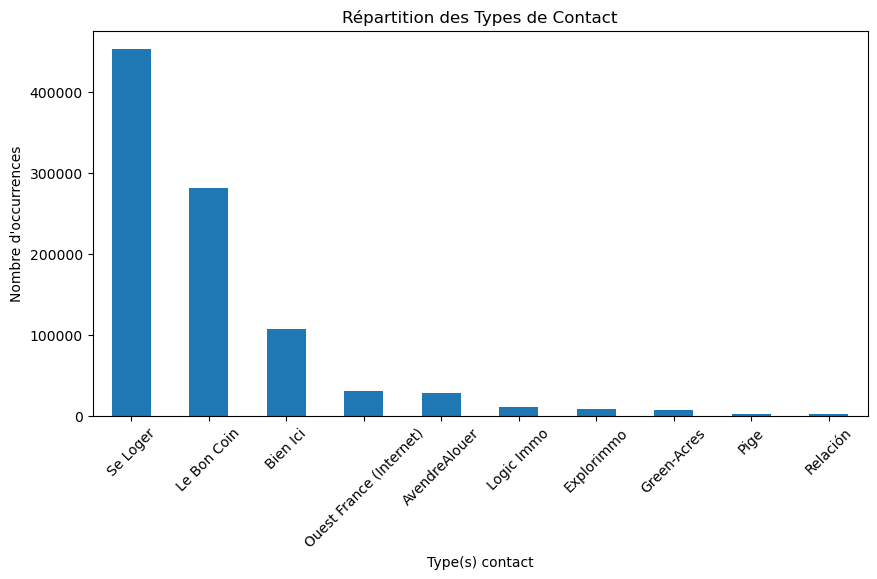

In [230]:
import matplotlib.pyplot as plt

# Comptage des valeurs uniques dans la colonne
origine_counts = df["origine"].value_counts().head(10)

# Création du barplot
plt.figure(figsize=(10, 5))
origine_counts.plot(kind='bar')

# Ajout des titres et labels
plt.title("Répartition des Types de Contact")
plt.xlabel("Type(s) contact")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité

# Affichage du graphique
plt.show()

## Analyse Top 10 Type de contact 

In [220]:
df["Type(s) contact"].value_counts()

Type(s) contact
Demandeur,Demandeur                    974897
Vendeur                                 89765
Demandeur                               35771
Acquéreur Archivé,Acquéreur Archivé     16917
Vendeur,Vendeur                         14404
                                        ...  
Demandeur,Expert                            1
Demandeur,Gardien                           1
Demandeur,Jeu concours                      1
Demandeur,Vendeur,Vendeur Signé             1
Demandeur,Vendeur,Apporteur                 1
Name: count, Length: 218, dtype: int64

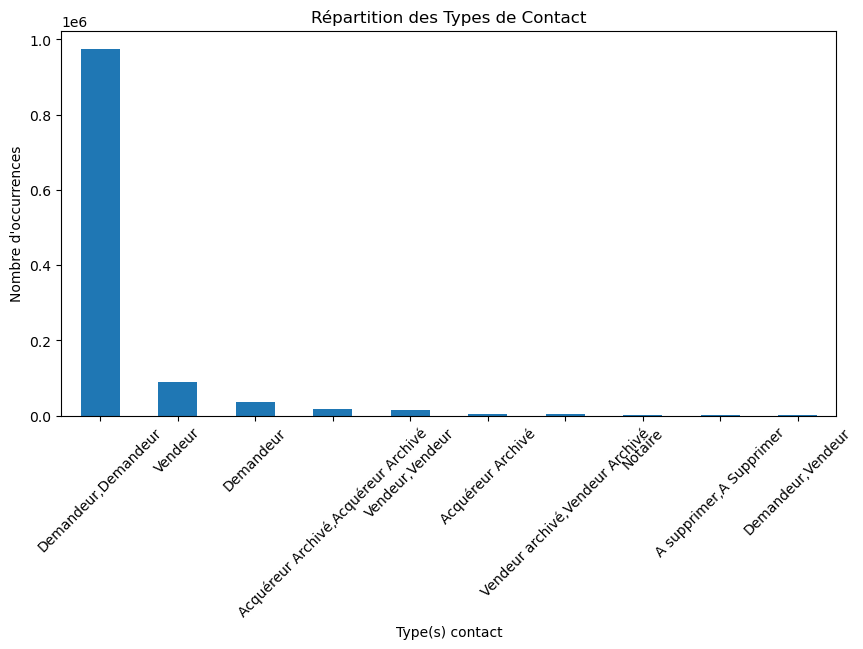

In [224]:
import matplotlib.pyplot as plt

# Comptage des valeurs uniques dans la colonne
contact_counts = df["Type(s) contact"].value_counts().head(10)

# Création du barplot
plt.figure(figsize=(10, 5))
contact_counts.plot(kind='bar')

# Ajout des titres et labels
plt.title("Répartition des Types de Contact")
plt.xlabel("Type(s) contact")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité

# Affichage du graphique
plt.show()